# Clasificación de flores Iris
Usaremos una SVM para realizar clasificación de las flores Iris. _Ya lo hemos hecho con otros metodos como arboles de decision_
Veremos que tal funciona con una Support Vector Machine o Maquina de soporte vectorial.
Recordemos que existen tres tipos de flor:
* Virgilica
* Setosa
* Versicolor

In [3]:
import pandas as pd
import numpy as np
from sklearn import svm, datasets
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
iris = datasets.load_iris()
print(iris) #me importa los datos como un array

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [6]:
X = iris.data[:,:2]#todas las filas de las columnas 1 y 2
Y = iris.target #todos los datos de target

In [14]:
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
print(x_min, x_max)
y_min,y_max = X[:,1].min()-1,X[:,1].max()+1
print(y_min, y_max)

h = (x_max-x_min)/100

xx, yy = np.meshgrid(np.arange(x_min,x_max,h), np.arange(y_min, y_max, h))

x_plot = np.c_[xx.ravel(), yy.ravel()]

3.3 8.9
1.0 5.4


In [16]:
x_plot

array([[3.3  , 1.   ],
       [3.356, 1.   ],
       [3.412, 1.   ],
       ...,
       [8.732, 5.368],
       [8.788, 5.368],
       [8.844, 5.368]])

In [25]:
C= 1.0
svc = svm.SVC(kernel="linear", C=C, decision_function_shape="ovr").fit(X,Y)
Ypred = svc.predict(x_plot)
Ypred = Ypred.reshape(xx.shape)

Text(0.5, 1.0, 'SVC para las flores Iris - KERNEL LINEAL')

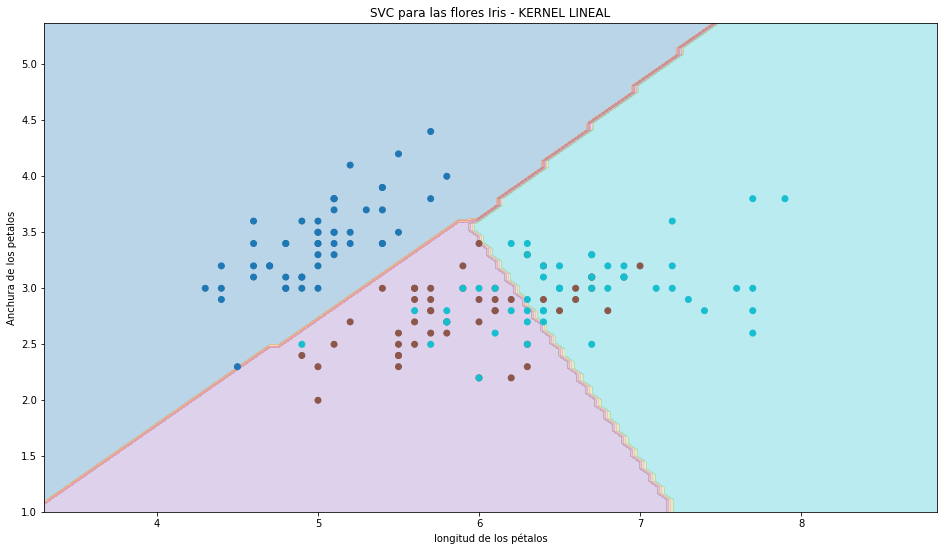

In [31]:
plt.figure(figsize=(16,9))
plt.contourf(xx,yy,Ypred, cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.tab10)
plt.xlabel("longitud de los pétalos")
plt.ylabel("Anchura de los petalos")
plt.title("SVC para las flores Iris - KERNEL LINEAL")

Estas son las regiones en las que se ha dividido la informacion

## Ejemplo con Kernel radial

In [36]:
C= 1.0
svc = svm.SVC(kernel="rbf", C=C, decision_function_shape="ovr", gamma='auto').fit(X,Y)
Ypred = svc.predict(x_plot)
Ypred = Ypred.reshape(xx.shape)

Text(0.5, 1.0, 'SVC para las flores Iris - KERNEL Radial')

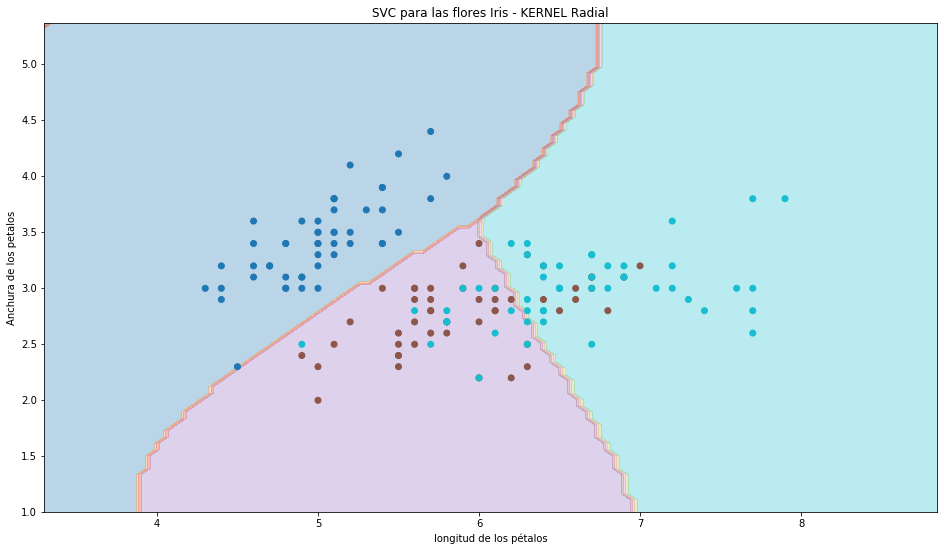

In [37]:
plt.figure(figsize=(16,9))
plt.contourf(xx,yy,Ypred, cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.tab10)
plt.xlabel("longitud de los pétalos")
plt.ylabel("Anchura de los petalos")
plt.title("SVC para las flores Iris - KERNEL Radial")

### Otros tipos de kernel

Text(0.5, 1.0, 'SVC para las flores Iris - KERNEL Poly')

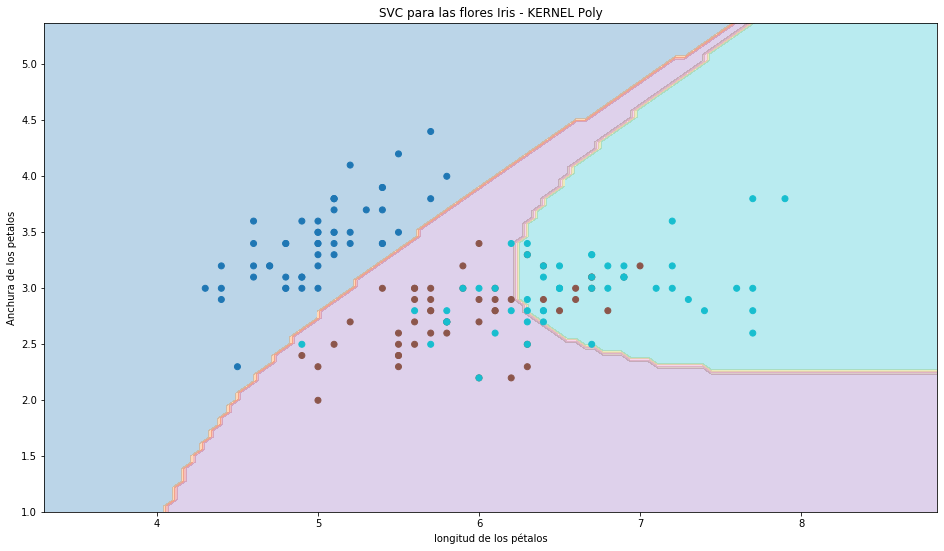

In [40]:
C= 1.0
svc = svm.SVC(kernel="poly", C=C, decision_function_shape="ovr", gamma='auto').fit(X,Y)
Ypred = svc.predict(x_plot)
Ypred = Ypred.reshape(xx.shape)

plt.figure(figsize=(16,9))
plt.contourf(xx,yy,Ypred, cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.tab10)
plt.xlabel("longitud de los pétalos")
plt.ylabel("Anchura de los petalos")
plt.title("SVC para las flores Iris - KERNEL Poly")

In [41]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.utils import shuffle

Primero vamos a barajar el dataset por que este nos viene 50 de un tipo, 50 de otro tipo y otros 50 del tipo final

In [44]:
X, Y = shuffle(X,Y, random_state=0)#barajo dataset

In [45]:
X_train, X_test,Ytrain, Y_test = train_test_split(X,Y,test_size=0.25, random_state=0)

In [47]:
parameters = [ #hacemos un diccionario
    {
        'kernel': ['rbf'],
        'gamma' : [1e-4,1e-3,1e-2,0.1,0.2,0.5],
        'C': [1,10,100,1000]
    },
    {
        'kernel':["linear"],
        'C':[1,10,100,1000]
    }
]

In [49]:
clf = GridSearchCV(svm.SVC(decision_function_shape='ovr'), param_grid=parameters, cv=5)#cv o cross validation de 5 elementos
clf.fit(X,Y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [50]:
clf.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [55]:
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
params = clf.cv_results_['params']
for m, s, p in zip(means, stds, params):
    print("%0.3f (+/%0.3f-) para %r"%(m,2*s,p))

0.747 (+/0.116-) para {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.747 (+/0.116-) para {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.760 (+/0.107-) para {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.793 (+/0.098-) para {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.793 (+/0.098-) para {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}
0.793 (+/0.115-) para {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
0.747 (+/0.116-) para {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.747 (+/0.116-) para {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.793 (+/0.098-) para {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.780 (+/0.100-) para {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.773 (+/0.115-) para {'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}
0.780 (+/0.124-) para {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}
0.747 (+/0.116-) para {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.793 (+/0.098-) para {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.787 (+/0.131-) para {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.780 (+/0.108-) para {'C': 100, 'gamma'

In [56]:
y_pred = clf.predict(X_test)

In [58]:
print(classification_report(Y_test, y_pred, target_names=["Setosas", "Vesicolor", "Virginica"]))

              precision    recall  f1-score   support

     Setosas       1.00      1.00      1.00        15
   Vesicolor       0.75      0.75      0.75        12
   Virginica       0.73      0.73      0.73        11

    accuracy                           0.84        38
   macro avg       0.83      0.83      0.83        38
weighted avg       0.84      0.84      0.84        38

